<a href="https://colab.research.google.com/github/youssefbelkhiri/machine_learning_models/blob/main/tempurature_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

In [45]:
!git clone https://github.com/youssefbelkhiri/machine_learning_models.git


Cloning into 'machine_learning_models'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 7), reused 27 (delta 2), pack-reused 0
Receiving objects: 100% (41/41), 9.42 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [46]:
%cd machine_learning_models


/content/machine_learning_models/today_raining_predction/machine_learning_models/today_raining_predction/machine_learning_models


In [47]:
%ls


'Humidity Prediction'/     tempurature_prediction_model.ipynb   tomorrow_raining_prediction/
 london_weather.csv        today_raining_predction/            'Visibilty Prediction'/
 README.md                 today_raining_prediction.ipynb       weatherAUS.csv
 tempurature_prediction/   tomorrow_raining.ipynb              'Wind Speed Prediction'/


In [48]:
%cd today_raining_predction

/content/machine_learning_models/today_raining_predction/machine_learning_models/today_raining_predction/machine_learning_models/today_raining_predction


In [49]:
%ls

austin_weather.csv  today_raining_prediction.ipynb


## Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [51]:
dataset = pd.read_csv('austin_weather.csv', na_values='-')
dataset.shape

(1319, 21)

In [52]:
dataset.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

# Correlation Visualization befor data preprocessing

In [53]:
dataset.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,T,


# **Data Pre-processing**

In [54]:
dataset.isnull().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
Events                         0
dtype: int64

In [55]:
dataset = dataset.iloc[:, [2,5,8,11,14,17,19]]

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempAvgF                   1319 non-null   int64  
 1   DewPointAvgF               1312 non-null   float64
 2   HumidityAvgPercent         1317 non-null   float64
 3   SeaLevelPressureAvgInches  1316 non-null   float64
 4   VisibilityAvgMiles         1307 non-null   float64
 5   WindAvgMPH                 1317 non-null   float64
 6   PrecipitationSumInches     1319 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 72.3+ KB


In [57]:
dataset.describe()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
count,1319.000000,1312.000000,1317.000000,1316.000000,1307.000000,1317.000000
mean,70.642911,56.632622,66.671982,30.022903,9.162204,5.008352
std,14.045904,14.866272,12.463634,0.172145,1.458883,2.086450
min,29.000000,8.000000,27.000000,29.550000,2.000000,1.000000
25%,62.000000,46.000000,59.000000,29.910000,9.000000,3.000000
50%,73.000000,61.000000,67.000000,30.000000,10.000000,5.000000
75%,83.000000,69.000000,74.000000,30.100000,10.000000,6.000000
max,93.000000,76.000000,97.000000,30.740000,10.000000,12.000000


In [58]:
for column in dataset.columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

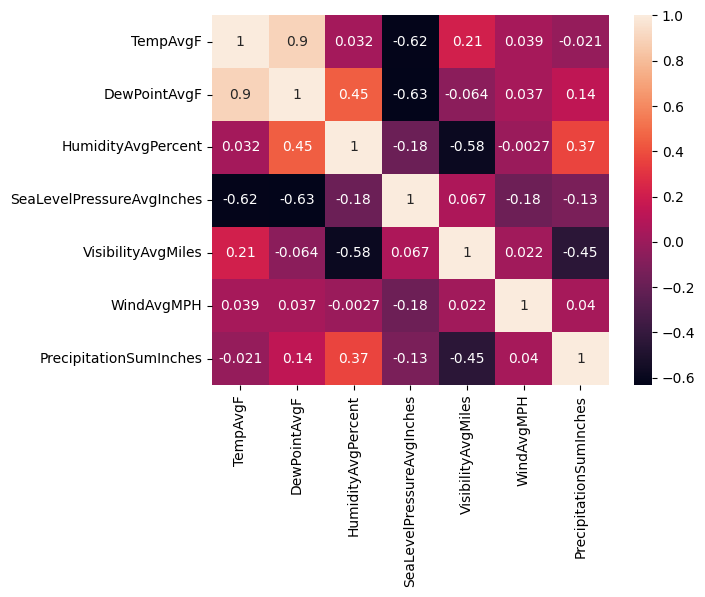

In [59]:
import seaborn as sns
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [60]:
def fill_missing_temp(group):
    group['AverageTemperature'] = group['AverageTemperature'].fillna(group['AverageTemperature'].mean())
    return group
def wrangle(data):
  data = data.copy()
  data = data.drop(columns = ['AverageTemperatureUncertainty','date','Latitude' , 'Longitude'],axis=1)
  data["dt"] = pd.to_datetime(data["dt"])
  data["month"] = data["dt"].dt.month
  data["year"] = data["dt"].dt.year
  data = data.drop("dt",axis=1)
  data = data[data["year"]>=2000]
  data = data.groupby(['City', data["month"]]).apply(fill_missing_temp)
  return data


In [61]:
# dataset = wrangle(dataset)
# dataset.head()
# dataset = dataset.replace('-', 0.0).astype(float)
dataset = dataset.dropna()

In [62]:
dataset.shape

(1185, 7)

In [63]:
dataset.isnull().sum()

TempAvgF                     0
DewPointAvgF                 0
HumidityAvgPercent           0
SeaLevelPressureAvgInches    0
VisibilityAvgMiles           0
WindAvgMPH                   0
PrecipitationSumInches       0
dtype: int64

# Correlation Visualization after preprocessing

# Train-Test Split

In [64]:
y = dataset["TempAvgF"]
x = dataset.drop("TempAvgF",axis=1)

In [65]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_x = LabelEncoder()
# x["City"] = labelencoder_x.fit_transform(x["City"])



In [66]:
x.shape

(1185, 6)

In [67]:
print(x)

      DewPointAvgF  HumidityAvgPercent  SeaLevelPressureAvgInches  \
0             49.0                75.0                      29.68   
1             36.0                68.0                      30.13   
2             27.0                52.0                      30.49   
3             28.0                56.0                      30.45   
5             36.0                63.0                      30.40   
...            ...                 ...                        ...   
1314          67.0                54.0                      29.97   
1315          64.0                54.0                      29.90   
1316          64.0                51.0                      29.86   
1317          68.0                48.0                      29.91   
1318          61.0                43.0                      29.97   

      VisibilityAvgMiles  WindAvgMPH  PrecipitationSumInches  
0                    7.0         4.0                    0.46  
1                   10.0         6.0         

In [68]:
from sklearn.model_selection import train_test_split
x_t , x_te , y_t , y_te = train_test_split(x,y,test_size=0.2,random_state=35)

In [69]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x = scaler.fit_transform(x)


In [70]:
import seaborn as sns
# plt.figure(figsize=(16,10))
# sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

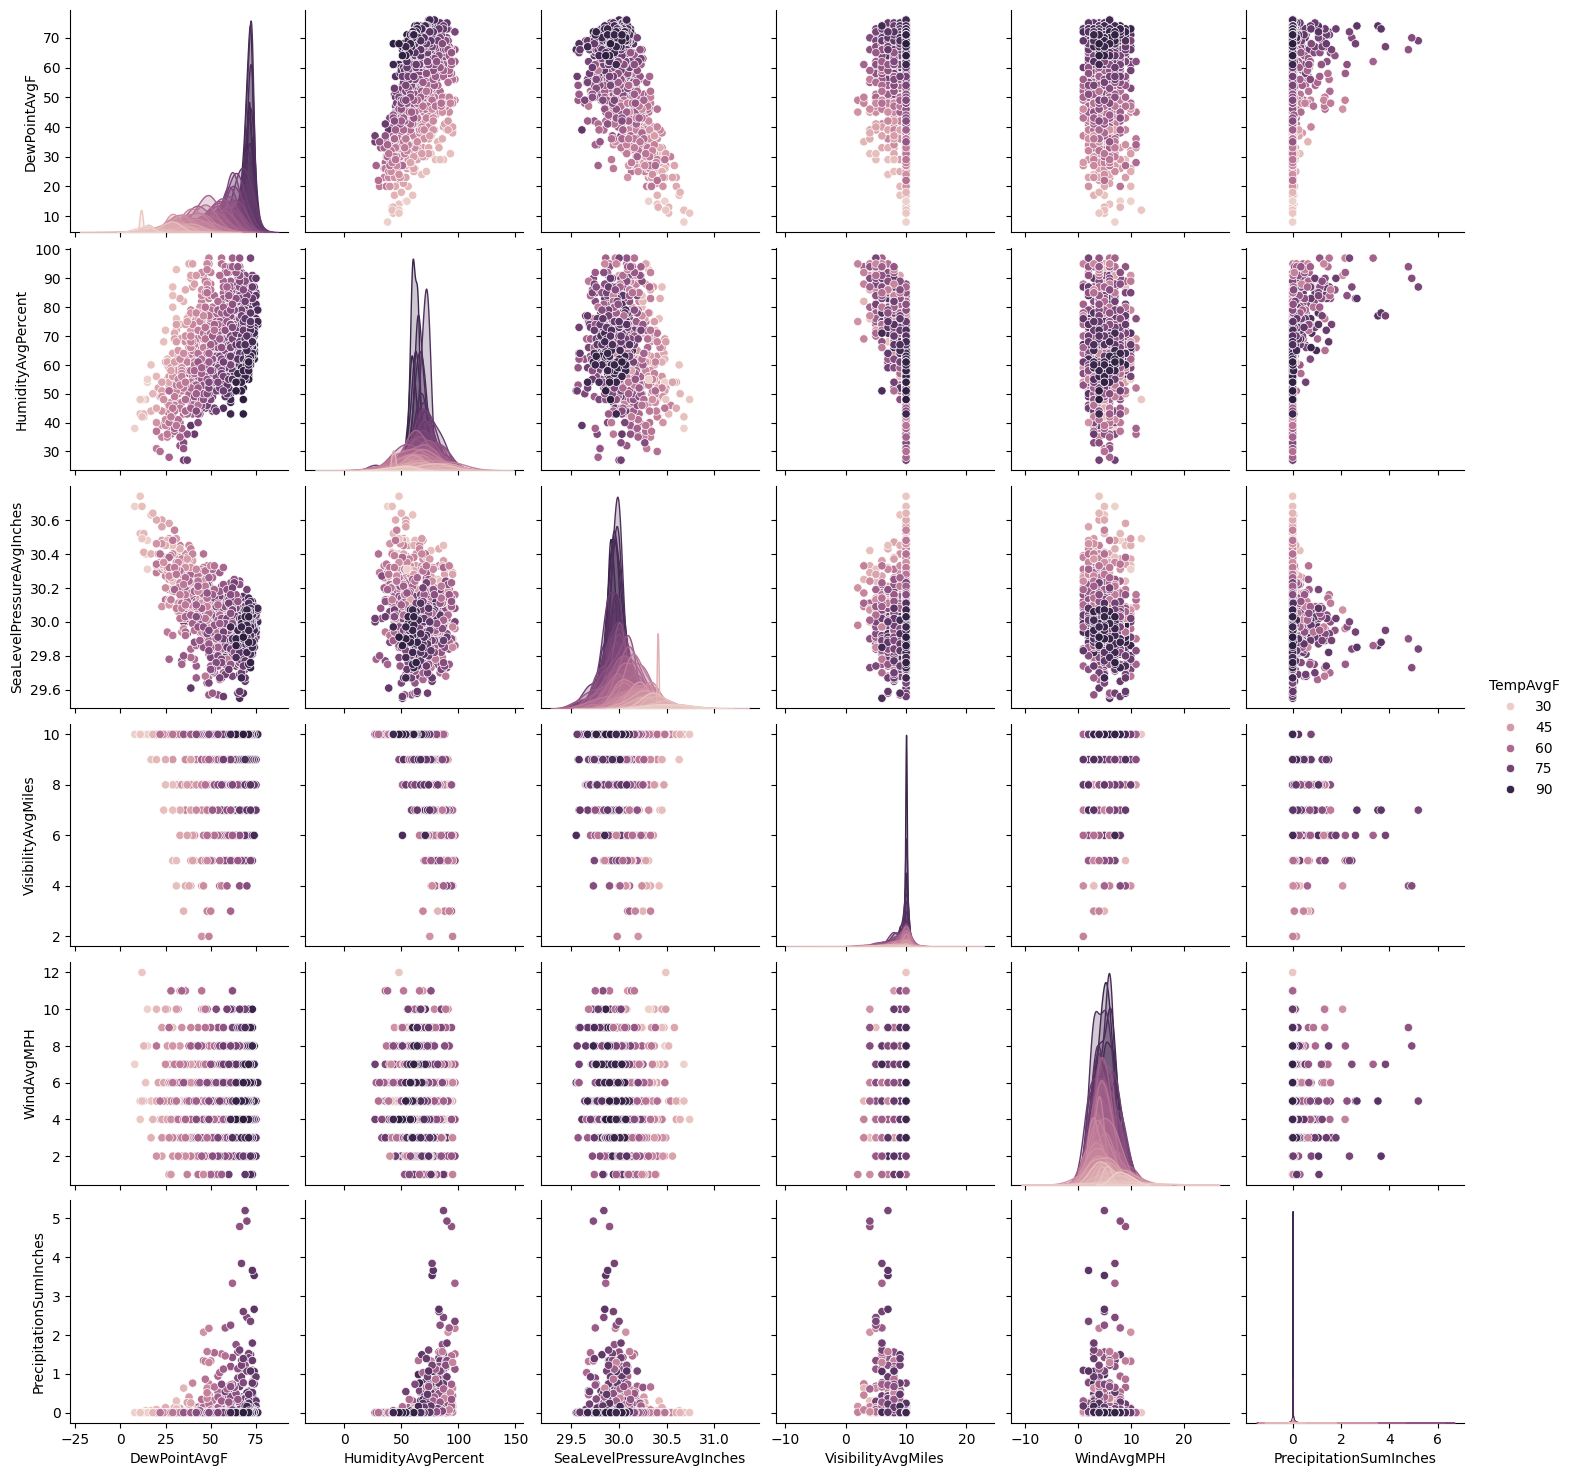

In [71]:
sns.pairplot(data = dataset,  hue='TempAvgF')
plt.show()

# Establish Baseline Mean Absolute Error

In [72]:
from sklearn.metrics import mean_absolute_error
y_p = [y.mean()] * len(y)
print('MAE:' , round(mean_absolute_error(y,y_p),5))

MAE: 11.74962


In [73]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [10, 20, 30, 40]
# }

# rf = RandomForestRegressor(random_state=77, n_jobs=-1)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_t, y_t)

# best_n_estimators = grid_search.best_params_

In [74]:
# print(best_n_estimators)

## Linear Regression Model
> Bloc en retrait



In [75]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.pipeline import make_pipeline
# from sklearn.ensemble import RandomForestRegressor
# forest = make_pipeline (
#     SelectKBest(k='all'),
#     RandomForestRegressor(n_estimators=200,max_depth=50,random_state=77,n_jobs=-1)
# )
# forest.fit(x,y)

## Predicting a new result

In [76]:
from sklearn.svm import SVR
forest = SVR(kernel='rbf')
forest.fit(x_t, y_t)


SVR()

In [77]:
from sklearn.metrics import mean_absolute_error
print('SVM Reagressor training MAE:',round(mean_absolute_error(y_t , forest.predict(x_t)), 5))
print('SVM Reagressor regressor test MAE:',round(mean_absolute_error(y_te , forest.predict(x_te)), 5))

SVM Reagressor training MAE: 1.67501
SVM Reagressor regressor test MAE: 1.68265


In [78]:
y_p = forest.predict(x_te)

## Visualising the Random Forest Regression results (higher resolution)

In [79]:
from sklearn.metrics import r2_score
print("train Score:",forest.score(x_t,y_t))
print("test Score:",forest.score(x_te,y_te))
mae = mean_absolute_error(y_te, y_p)
r2 = r2_score(y_te,y_p)
print("r2 score",r2)
mae = mean_absolute_error(y_te, y_p)
print(mae)

train Score: 0.9692838706162981
test Score: 0.9689855667031918
r2 score 0.9689855667031918
1.6826536130084253
